In [2]:
!pip install pandas numpy matplotlib seaborn 


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Exploratory Data Analysis (EDA)

In [19]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("./Customers.csv")
products = pd.read_csv("./Products.csv")
transactions = pd.read_csv("./Transactions.csv")

# Preview datasets
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [11]:
# Basic Info
print(customers.info())
print(products.info())
print(transactions.info())

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
 4   SignupYear    200 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 7.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entri

## Data Understanding and Feature Engineering

In [12]:
# Descriptive statistics
print(transactions.describe())


                     TransactionDate     Quantity   TotalValue       Price  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

              Year        Month  
count  1000.000000  1000.000000  
mean   2023.996000     6.288000  
min    2023.000000     1.000000  
25%    2024.000000     3.000000  
50%    2024.000000     6.000000  
75%    2024.000000     9.000000  
max    2024.000000    12.000000  
std       0.063151     3.

In [13]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Year'] = transactions['TransactionDate'].dt.year
transactions['Month'] = transactions['TransactionDate'].dt.month
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year

In [14]:
# Merge transactions with products and customers
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

## Visualizations

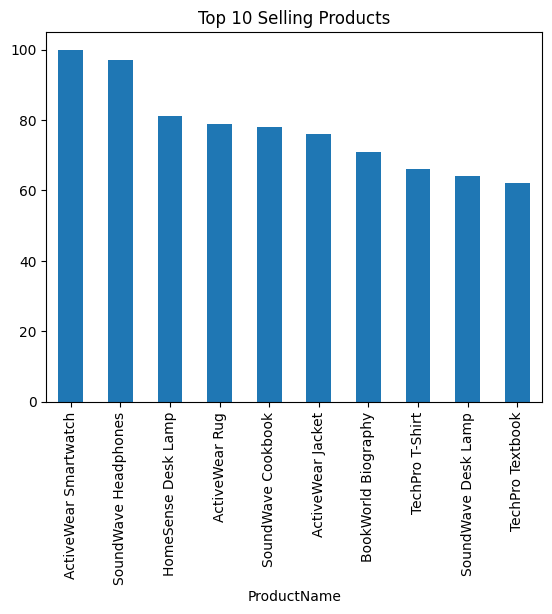

In [15]:
top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
top_products.head(10).plot(kind='bar', title='Top 10 Selling Products')
plt.show()

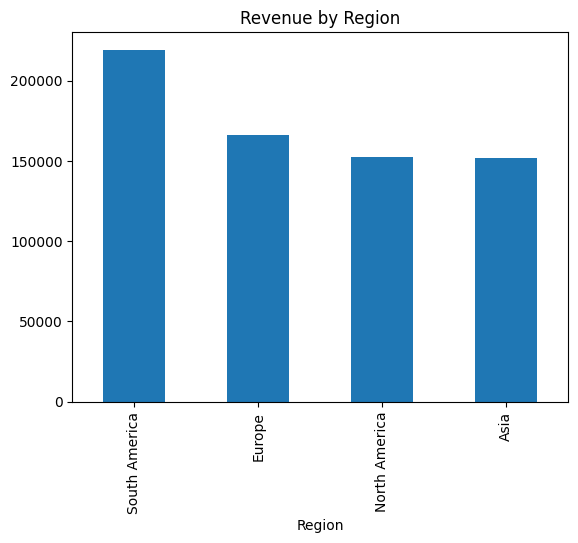

In [16]:
revenue_region = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
revenue_region.plot(kind='bar', title='Revenue by Region')
plt.show()

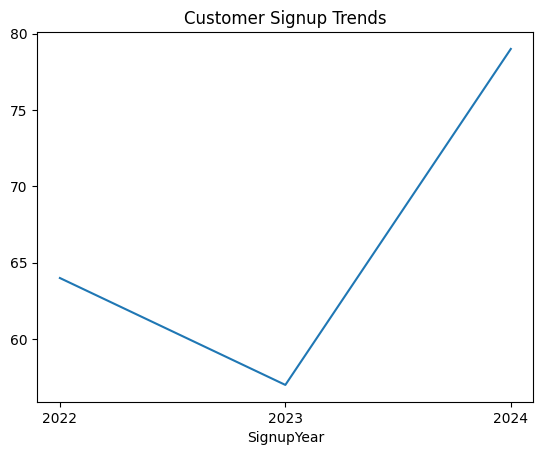

In [17]:
signup_trends = customers['SignupYear'].value_counts().sort_index()
signup_trends.plot(kind='line', title='Customer Signup Trends')

plt.xticks(ticks=signup_trends.index, labels=signup_trends.index.astype(int))
plt.show()

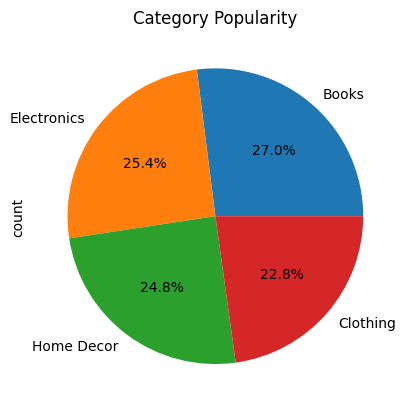

In [18]:
category_popularity = data['Category'].value_counts()
category_popularity.plot(kind='pie', autopct='%1.1f%%', title='Category Popularity')
plt.show()